In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
fullData = pd.read_csv("data.csv", sep=";")
fullData

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0
...,...,...,...,...
1033,2023-01-09 00:00:00,2754,2990,41
1034,2023-01-10 00:00:00,3032,5062,47
1035,2023-01-11 00:00:00,4201,5122,46
1036,2023-01-12 00:00:00,4675,4541,48


In [3]:
col = [fullData.columns[0], fullData.columns[1]]
col

['Дата', 'Заражений за день']

In [4]:
temp = [i for i in range(1, len(fullData[col[0]])+1)]
df = pd.DataFrame({col[0] : temp, col[1] : fullData[col[1]]})
df

,Дата,Заражений за день
0,1,34
1,2,11
2,3,14
3,4,4
4,5,28
...,...,...
1033,1034,2754
1034,1035,3032
1035,1036,4201
1036,1037,4675


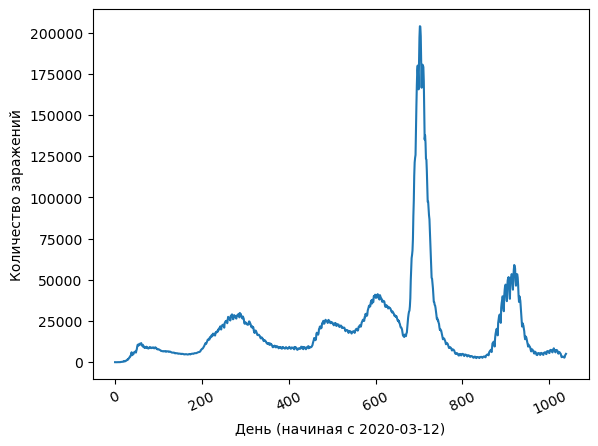

In [5]:
plt.plot(df[col[0]], df[col[1]])
plt.xlabel("День (начиная с 2020-03-12)")
plt.ylabel("Количество заражений")
plt.xticks(rotation=25) 
plt.show()

In [15]:
fd = 1 / len(df[col[0]])
spectrum = np.fft.fft(df[col[1]])
freqs = np.fft.fftfreq(len(spectrum), fd)
spectrum = np.fft.fftshift(spectrum)
freqs = np.fft.fftshift(freqs)

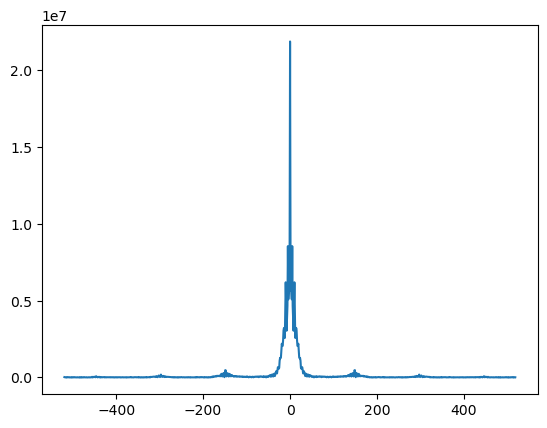

In [17]:
plt.plot(freqs, np.abs(spectrum))
plt.show()

(0.0, 20.0)

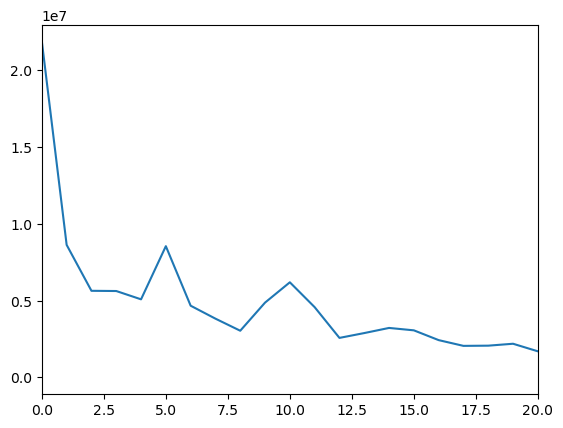

In [18]:
plt.plot(freqs, np.abs(spectrum))
plt.xlim(0,20)

In [40]:
spectrum = np.fft.fft(df[col[1]])
re = spectrum.real
im = spectrum.imag
f = np.zeros(df.shape[0])
for w in range(int(10)):
    for t in range(df.shape[0]):
        f[t] += ((1 / df.shape[0]) * (abs(spectrum[w]) * np.cos(2 * np.pi / df.shape[0] * w * t  + np.angle(spectrum[w]))))

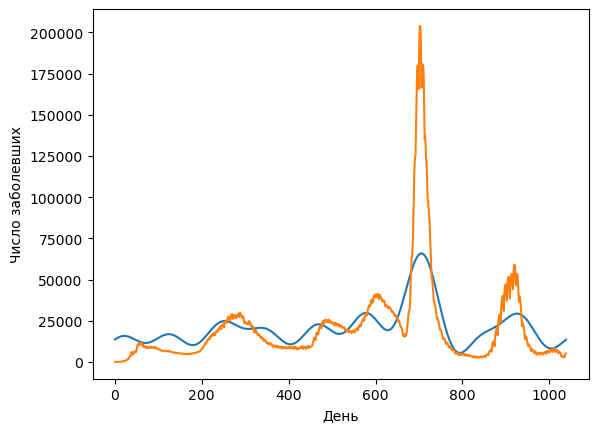

In [41]:
plt.plot(df[col[0]], f)
plt.plot(df[col[0]], df['Заражений за день'])
plt.xlabel('День')
plt.ylabel('Число заболевших');

In [42]:
dif = np.diff(f)
waves_max = []
waves_num = []
print('Дни пиков заражаемости в волнах:')
for i in range(1, len(dif)-1):
    if (abs(dif[i-1]) > abs(dif[i])) & (abs(dif[i+1]) > abs(dif[i])) & (dif[i-1] > 0) & (dif[i+1] < 0):
        print(df[col[0]][i])
        waves_max.append(df[col[0]][i])
        waves_num.append(i)

Дни пиков заражаемости в волнах:
22
124
253
335
469
577
705
925
